In [1]:
import random
import numpy
###1
f1="norm_wiki_en.txt"
f2="norm_wiki_eo.txt"
f3="norm_wiki_et.txt"
f4="norm_wiki_ht.txt"
f5="norm_wiki_la.txt"
f6="norm_wiki_nv.txt"
f7="norm_wiki_so.txt"
s0="sample0.txt"
s1="sample1.txt"
s2="sample2.txt"
s3="sample3.txt"
s4="sample4.txt"
s5="sample5.txt"
with open(f1) as f:
    english=f.readlines()[0][1:]
with open(f2) as f:
    esperanto=f.readlines()[0][1:]
with open(f3) as f:
    estonian=f.readlines()[0][1:]
with open(f4) as f:
    haitian=f.readlines()[0][1:]
with open(f5) as f:
    latin=f.readlines()[0][1:]
with open(f6) as f:
    navaho=f.readlines()[0][1:]
with open(f7) as f:
    somali=f.readlines()[0][1:]
with open(s0) as f:
    sample0=f.readlines()[0][1:]
with open(s1) as f:
    sample1=f.readlines()[0][1:]
with open(s2) as f:
    sample2=f.readlines()[0][1:]
with open(s3) as f:
    sample3=f.readlines()[0][1:]
with open(s4) as f:
    sample4=f.readlines()[0][1:]
with open(s5) as f:
    sample5=f.readlines()[0][1:]

In [2]:
import math
import copy
def dict_create_letters(text, nr):
    words=[text[i:i+nr] for i in range(len(text)-nr+1)]
    x={}
    for i in words:
        if i[:-1] not in x:
            x[i[:-1]]={}
        x[i[:-1]][i[-1]]=x[i[:-1]].get(i[-1],0)+1
    return x

def dict_create_words(text, nr):
    text=text.split(" ")
    words=[text[i:i+nr] for i in range(len(text)-nr+1)]
    x={}
    for i in words:
        if " ".join(i[:-1]) not in x:
            x[" ".join(i[:-1])]={}
        x[" ".join(i[:-1])][i[-1]]=x[" ".join(i[:-1])].get(i[-1],0)+1
    return x

def normalize(x):
    y=copy.deepcopy(x)
    for key1 in y.keys():
        sumkey1=sum(y[key1].values())
        for key2 in y[key1].keys():
            y[key1][key2]/=sumkey1
    return y

def nr_of_words(x):
    sumv=0
    for key1 in x.keys():
        sumv+=sum(x[key1].values())
    return sumv

def entropy(set):
    entr=0
    len=nr_of_words(set)
    nor=normalize(set)
    for key1 in set.keys():
        for key2 in set[key1].keys():
            entr-=(set[key1][key2]/len)*math.log2(nor[key1][key2])
    return entr


Entropy computing

In [3]:
import matplotlib.pyplot as plt
names=[english,latin,esperanto,estonian,somali,haitian,navaho]
words_values=[[]for _ in range(1,8)]
for i,name in enumerate(names):
    for j in range(1,8):
        a=dict_create_words(name,j)
        words_values[i].append(entropy(a))

In [4]:
letters_values=[[]for _ in range(1,8)]
for i,name in enumerate(names):
    for j in range(1,8):
        a=dict_create_letters(name,j)
        letters_values[i].append(entropy(a))

In [5]:
str_names=['english','latin','esperanto','estonian','somali','haitian','navaho']
for i in range(len(str_names)):
    while(len(str_names[i])<9):
        str_names[i]=str_names[i]+" "

In [6]:
print("Words")
average_words=[sum([words_values[i][j] for i in range(7)])/7 for j in range(7)]
maxi_words=[max([words_values[i][j] for i in range(7)]) for j in range(7)]
mini_words=[min([words_values[i][j] for i in range(7)]) for j in range(7)]
print()
print("Rank\t\t0\t  1\t      2\t\t3\t    4\t      5\t\t6")
for i,row in enumerate(words_values):
    print(str_names[i],end=" | ")
    for elem in row:
        print("{:.6f}".format(elem),end=" | ")
    print()
print("\nLetters")
average_letters=[sum([letters_values[i][j] for i in range(7)])/7 for j in range(7)]
maxi_letters=[max([letters_values[i][j] for i in range(7)]) for j in range(7)]
mini_letters=[min([letters_values[i][j] for i in range(7)]) for j in range(7)]
print()
print("Rank\t\t0\t  1\t      2\t\t3\t    4\t      5\t\t6")
for i,row in enumerate(letters_values):
    print(str_names[i],end=" | ")
    for elem in row:
        print("{:.6f}".format(elem),end=" | ")
    print()

Words

Rank		0	  1	      2		3	    4	      5		6
english   | 11.544000 | 6.389175 | 2.176459 | 0.484679 | 0.109653 | 0.030771 | 0.011965 | 
latin     | 11.969199 | 4.400031 | 1.166890 | 0.388041 | 0.206475 | 0.165114 | 0.149596 | 
esperanto | 11.560534 | 6.557678 | 2.484719 | 0.633618 | 0.161658 | 0.046906 | 0.019294 | 
estonian  | 13.746250 | 5.424185 | 0.904745 | 0.116197 | 0.023647 | 0.007510 | 0.002907 | 
somali    | 11.731116 | 5.398734 | 1.608622 | 0.409606 | 0.116611 | 0.039506 | 0.019553 | 
haitian   | 8.166933 | 3.193124 | 1.311338 | 0.812240 | 0.620585 | 0.545419 | 0.474410 | 
navaho    | 9.154075 | 3.863969 | 1.718832 | 0.899274 | 0.538580 | 0.313857 | 0.188290 | 

Letters

Rank		0	  1	      2		3	    4	      5		6
english   | 4.288222 | 3.516605 | 3.018319 | 2.481566 | 2.021185 | 1.672409 | 1.387696 | 
latin     | 4.228248 | 3.450126 | 2.823492 | 2.152031 | 1.642764 | 1.312747 | 1.069051 | 
esperanto | 4.176789 | 3.340005 | 2.871827 | 2.392625 | 1.991510 | 1.709018 | 1.487268 |

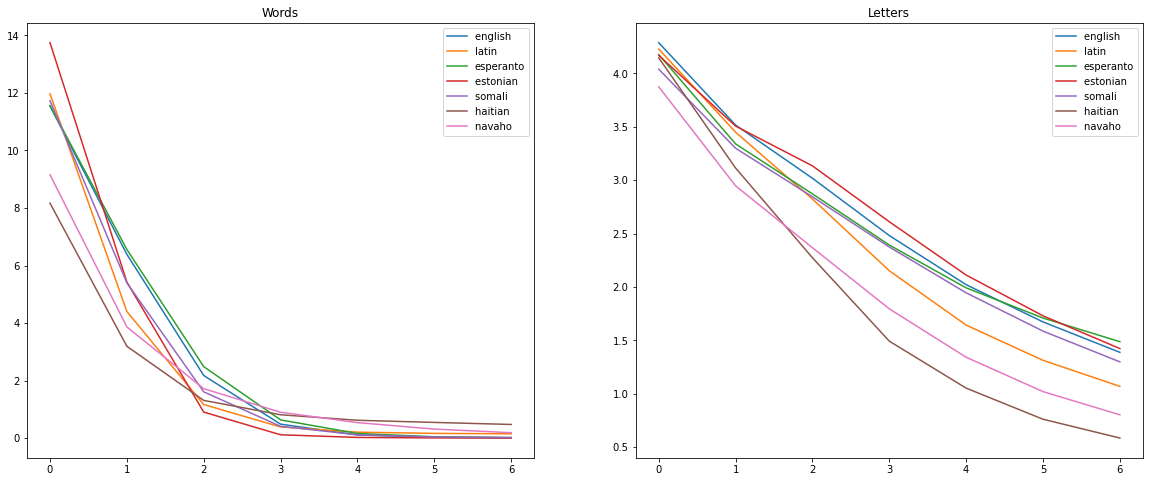

In [7]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1, 2, 1)
plt.title("Words")
for i in range(7):
    plt.plot(words_values[i],label=str_names[i])
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Letters")
for i in range(7):
    plt.plot(letters_values[i],label=str_names[i])
plt.legend()
plt.show()

In [8]:
samples=[sample0,sample1,sample2,sample3,sample4,sample5]
words_values_sample=[[]for _ in range(6)]
for i,samplee in enumerate(samples):
    for j in range(1,8):
        a=dict_create_words(samplee,j)
        words_values_sample[i].append(entropy(a))

In [9]:
letters_values_sample=[[]for _ in range(6)]
for i,samplee in enumerate(samples):
    for j in range(1,8):
        a=dict_create_letters(samplee,j)
        letters_values_sample[i].append(entropy(a))

In [10]:
str_samples=['sample0','sample1','sample2','sample3','sample4','sample5']

In [11]:
print("Words")
print("Rank\t\t0\t  1\t      2\t\t3\t    4\t      5\t\t6")
for i,row in enumerate(words_values_sample):
    print(str_samples[i],end=" | ")
    for elem in row:
        print("{:.6f}".format(elem),end=" | ")
    print()
print("\nLetters")
print("Rank\t\t0\t  1\t      2\t\t3\t    4\t      5\t\t6")
for i,row in enumerate(letters_values_sample):
    print(str_samples[i],end=" | ")
    for elem in row:
        print("{:.6f}".format(elem),end=" | ")
    print()

Words
Rank		0	  1	      2		3	    4	      5		6
sample0 | 7.748754 | 7.486385 | 4.406697 | 0.595009 | 0.012062 | 0.000101 | 0.000003 | 
sample1 | 11.500708 | 5.372240 | 1.574738 | 0.507511 | 0.293458 | 0.150565 | 0.116729 | 
sample2 | 8.023881 | 7.348615 | 3.781933 | 0.859506 | 0.081991 | 0.002987 | 0.000080 | 
sample3 | 9.061130 | 5.950219 | 2.630805 | 1.264090 | 0.414327 | 0.200123 | 0.112784 | 
sample4 | 17.129667 | 3.444255 | 0.234076 | 0.003227 | 0.000008 | 0.000000 | 0.000000 | 
sample5 | 16.509543 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 

Letters
Rank		0	  1	      2		3	    4	      5		6
sample0 | 4.273001 | 2.915894 | 2.000359 | 1.539282 | 1.438581 | 1.391969 | 1.302846 | 
sample1 | 4.127006 | 3.239150 | 2.861280 | 2.326685 | 1.813510 | 1.431125 | 1.142003 | 
sample2 | 3.993312 | 3.050439 | 2.467660 | 1.939773 | 1.702033 | 1.614413 | 1.539877 | 
sample3 | 3.930298 | 3.184467 | 2.627896 | 2.023992 | 1.534244 | 1.250414 | 1.084054 | 
sample4 | 4.253810 | 4

Charts

Blue lines indicate maximum, average and minimum values for a given rank among texts from real languages

The red line indicates the values for the sample texts

In [12]:
plt.rcParams['figure.figsize'] = [15, 6]

In [14]:
def create_plot(nr):
    plt.subplot(1, 2, 1)
    plt.plot(average_words,color="blue")
    plt.plot(mini_words,color="blue")
    plt.plot(maxi_words,color="blue")
    plt.title("Words")
    plt.xlabel('depth')
    plt.ylabel('entropy')
    plt.plot(words_values_sample[nr],color="red",label=str_samples[nr])
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(average_letters,color="blue")
    plt.plot(mini_letters,color="blue")
    plt.plot(maxi_letters,color="blue")
    plt.title("Letters")
    plt.xlabel('depth')
    plt.ylabel('entropy')
    plt.plot(letters_values_sample[nr],color="red",label=str_samples[nr])
    plt.legend()
    plt.show()

# Sample0

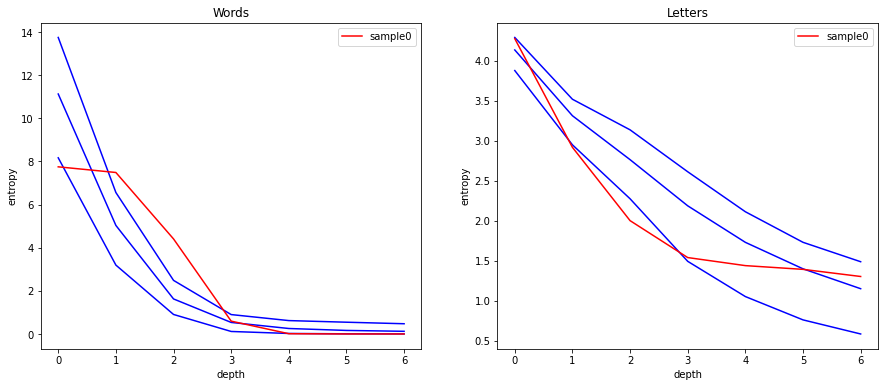

In [15]:
create_plot(0)

Sample0 does not contain natural language due to different graph shape for letters as well as words (very small difference in entropy for words between 0 and 1 rank)

# Sample1

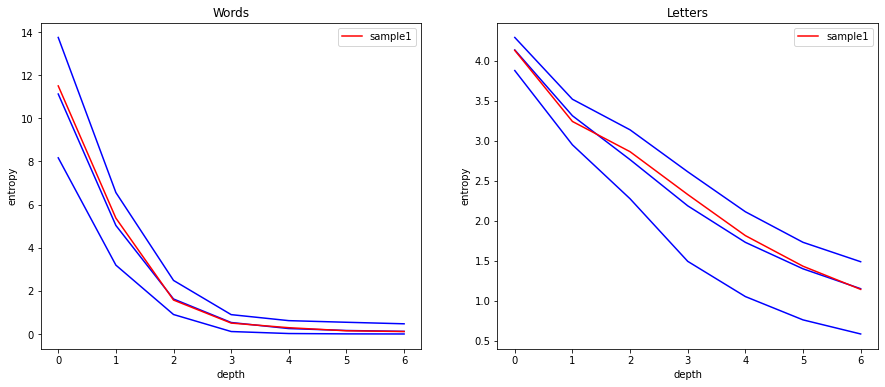

In [16]:
create_plot(1)

Sample1 takes entropy values very close to the average of real languages so I think it is also a natural language

# Sample2

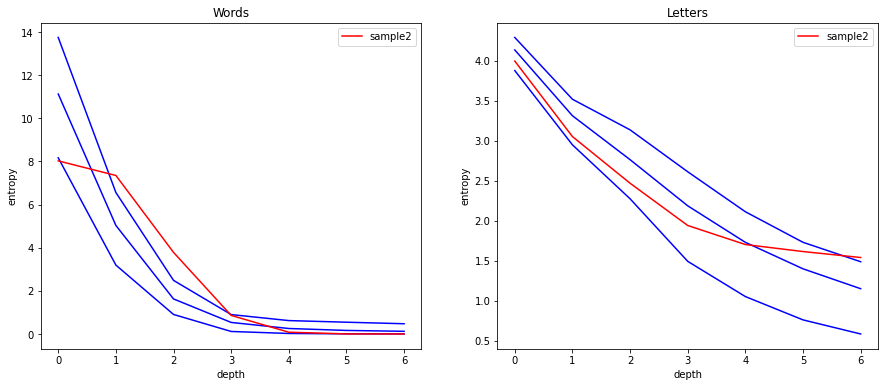

In [17]:
create_plot(2)

Sample2 has graphs with a very similar shape to Sample0 and for the same reason I think it is not a natural language 

# Sample3

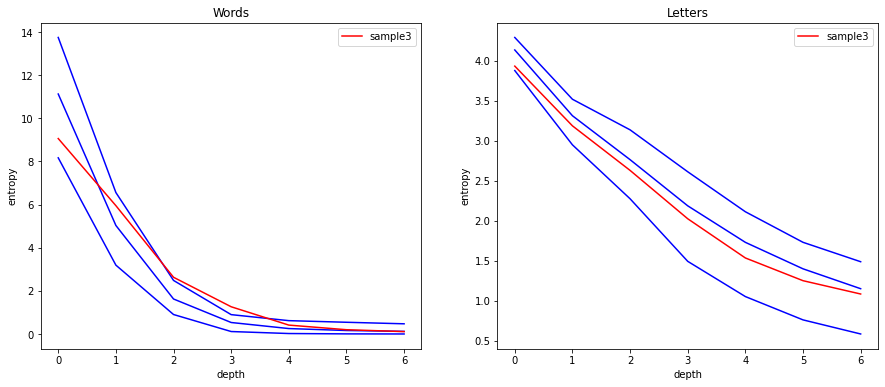

In [18]:
create_plot(3)

Sample3: entropy for words is not between minimum and maximum but it has the right shape and additionally entropy for letters is very close to average so I think it is a natural language

# Sample4

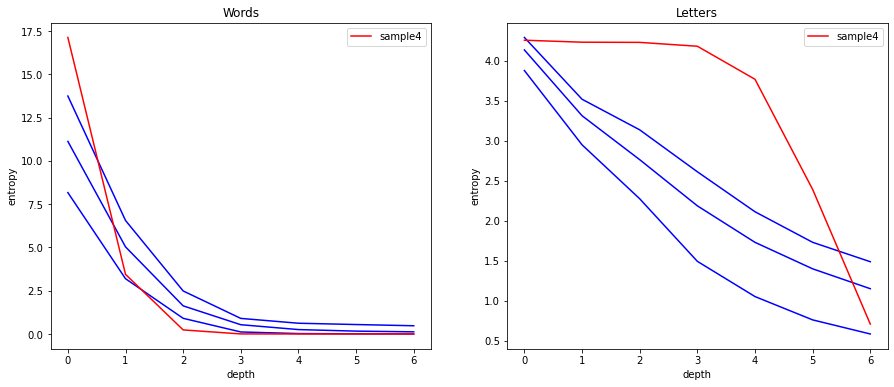

In [19]:
create_plot(4)

Sample4: entropy for words already for rank 2 reaches a value close to 0 and entropy for letters does not change between 0 and 4 ranks so it is not natural language

# Sample5

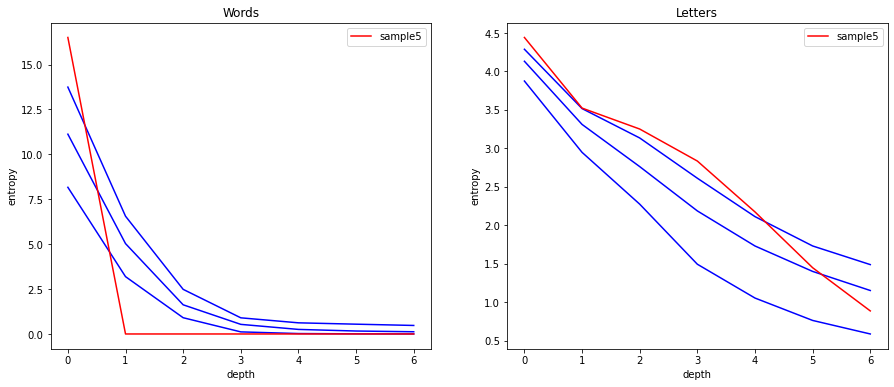

In [20]:
create_plot(5)

Sample5: entropy for letters has no ideal shape and additionally entropy for words already for rank 1 reaches 0 so it is not a natural language

# Summing up:

In [21]:
print("Sample0: no\nSample1: yes\nSample2: no\nSample3: yes\nSample4: no\nSample5: no")

Sample0: no
Sample1: yes
Sample2: no
Sample3: yes
Sample4: no
Sample5: no
